# Will Garbutt

## Research question/interests

**Is there a relationship between mortgage affordability and metroplolitan area population? is a region with a larger population more likely to be less affordable**

**How does mortgage afforability change with time for differnt tiers? Do all tiers follow the same trend or do they have their own? If they do, (as one tier goes up/down so does the other) is it a constant relationship (change at same rate) or not (e.i. as one increases/decreases does the other increase/decrease more/less rapidly**

# EDA
 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#project functions
import sys
sys.path.append('./code') 
import project_functions_will as func

In [ ]:
#style
plt.figure(figsize=(10, 6))
sns.set_theme(style="white", font_scale=1.3)
plt.rc("axes.spines", top=False, right=False)

<Figure size 1000x600 with 0 Axes>

In [ ]:
#get initial data
raw = '../data/raw/TieredAffordability_Mortgage.csv'
df = pd.read_csv(raw)
df.head()


,RegionID,RegionName,PopRank,tier,1999-06-30,1999-09-30,1999-12-31,2000-03-31,2000-06-30,2000-09-30,...,2014-03-31,2014-06-30,2014-09-30,2014-12-31,2015-03-31,2015-06-30,2015-09-30,2015-12-31,2016-03-31,2016-06-30
0,102001,United States,0,Bottom Tier,0.300007,0.315030,0.316834,0.334600,0.343596,0.337009,...,0.218583,0.214530,0.216564,0.216521,0.213811,0.219128,0.226646,0.231051,0.226693,0.230251
1,102001,United States,0,Middle Tier,0.183958,0.191210,0.196901,0.206566,0.210426,0.204491,...,0.151174,0.148104,0.147641,0.142041,0.140656,0.145460,0.144927,0.146747,0.142884,0.142414
2,102001,United States,0,Upper Tier,0.147950,0.155872,0.157198,0.166470,0.171481,0.168676,...,0.118414,0.116467,0.116019,0.114419,0.111791,0.112807,0.114031,0.114362,0.110954,0.110559
3,394347,"Atlanta, GA",9,Bottom Tier,0.252002,0.267823,0.273127,0.293248,0.303532,0.299580,...,0.152979,0.153131,0.156237,0.157940,0.156826,0.163094,0.169798,0.174702,0.171642,0.173135
4,394347,"Atlanta, GA",9,Middle Tier,0.164372,0.171317,0.176344,0.183898,0.185946,0.181044,...,0.118612,0.117381,0.117480,0.113326,0.113214,0.117454,0.118066,0.120754,0.117895,0.117187


## Proccessing Data

### First we will find the average accros all our time periods for each entrie(row)

In [ ]:
df_avg = func.withAverageColumn(raw)
df_avg

,RegionID,RegionName,PopRank,tier,1999-06-30,1999-09-30,1999-12-31,2000-03-31,2000-06-30,2000-09-30,...,2014-06-30,2014-09-30,2014-12-31,2015-03-31,2015-06-30,2015-09-30,2015-12-31,2016-03-31,2016-06-30,Average_affordability
0,102001,United States,0,Bottom Tier,0.300007,0.315030,0.316834,0.334600,0.343596,0.337009,...,0.214530,0.216564,0.216521,0.213811,0.219128,0.226646,0.231051,0.226693,0.230251,0.294283
1,102001,United States,0,Middle Tier,0.183958,0.191210,0.196901,0.206566,0.210426,0.204491,...,0.148104,0.147641,0.142041,0.140656,0.145460,0.144927,0.146747,0.142884,0.142414,0.182545
2,102001,United States,0,Upper Tier,0.147950,0.155872,0.157198,0.166470,0.171481,0.168676,...,0.116467,0.116019,0.114419,0.111791,0.112807,0.114031,0.114362,0.110954,0.110559,0.148892
3,394347,"Atlanta, GA",9,Bottom Tier,0.252002,0.267823,0.273127,0.293248,0.303532,0.299580,...,0.153131,0.156237,0.157940,0.156826,0.163094,0.169798,0.174702,0.171642,0.173135,0.241499
4,394347,"Atlanta, GA",9,Middle Tier,0.164372,0.171317,0.176344,0.183898,0.185946,0.181044,...,0.117381,0.117480,0.113326,0.113214,0.117454,0.118066,0.120754,0.117895,0.117187,0.147793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,395209,"Washington, DC",7,Middle Tier,0.172152,0.177780,0.182145,0.189783,0.193100,0.187900,...,0.182190,0.181112,0.174821,0.173381,0.178910,0.177032,0.178584,0.172367,0.169965,0.210889
143,395209,"Washington, DC",7,Upper Tier,0.143937,0.152711,0.154567,0.165191,0.171749,0.171423,...,0.151683,0.149672,0.147656,0.144108,0.144019,0.144066,0.143958,0.139361,0.137443,0.175876
144,753899,"Los Angeles-Long Beach-Anaheim, CA",2,Bottom Tier,0.558370,0.583666,0.591128,0.632834,0.655198,0.645562,...,0.743749,0.754011,0.750753,0.743036,0.758846,0.775822,0.792530,0.782563,0.789578,0.809504
145,753899,"Los Angeles-Long Beach-Anaheim, CA",2,Middle Tier,0.305483,0.317189,0.328168,0.346593,0.354193,0.345239,...,0.393393,0.395619,0.383162,0.382531,0.396277,0.395686,0.402116,0.393042,0.390708,0.425333


### Lets filter this dataset to only show our average affordability and population rank by area to see if we can find any correlation

In [ ]:
#avg all tiers together
untiered = func.load_and_process_untieredaverage(raw)
untiered.head()

,RegionName,RegionID,PopRank,Average_affordability
0,United States,102001.0,0.0,0.208361
1,"New York, NY",394913.0,1.0,0.428749
2,"Los Angeles-Long Beach-Anaheim, CA",753899.0,2.0,0.518046
3,"Chicago, IL",394463.0,3.0,0.227199
4,"Dallas-Fort Worth, TX",394514.0,4.0,0.155297


In [ ]:
#save data
untiered.to_csv('../data/processed/untieredMortgageAffortability')

### Now let's start ploting mortgage affordability vs. populatin rank

([<matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>,
  <matplotlib.axis.YTick>],
 [Text(0, 0, '0.0'),
  Text(0, 3, '3.0'),
  Text(0, 6, '6.0'),
  Text(0, 9, '9.0'),
  Text(0, 12, '12.0'),
  Text(0, 15, '15.0'),
  Text(0, 18, '18.0'),
  Text(0, 21, '21.0'),
  Text(0, 24, '24.0'),
  Text(0, 27, '27.0'),
  Text(0, 30, '30.0'),
  Text(0, 33, '34.0'),
  Text(0, 36, '37.0'),
  Text(0, 39, '40.0'),
  Text(0, 42, '43.0'),
  Text(0, 45, '46.0'),
  Text(0, 48, '49.0')])

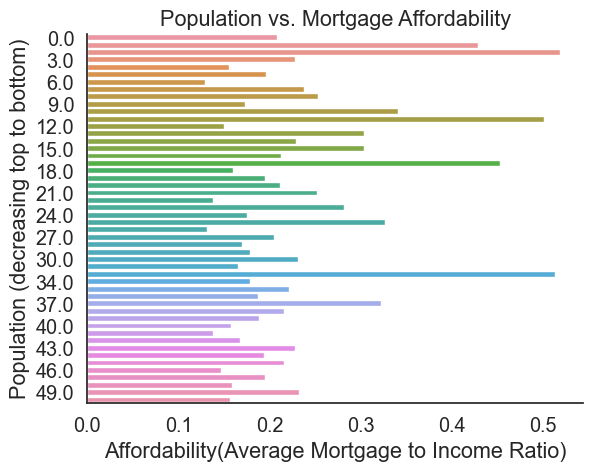

In [ ]:
#lets visualize the relationship of population rank and affordability
bar = sns.barplot(data = untiered, x='Average_affordability', y='PopRank', orient='h' )
bar.set(title='Population vs. Mortgage Affordability', xlabel= 'Affordability(Average Mortgage to Income Ratio)', ylabel='Population (decreasing top to bottom)')
yticks = range(0, len(untiered['PopRank']), 3)
plt.yticks(yticks, untiered['PopRank'].iloc[yticks])

### Observation

Initially we do not see much correlation

### Let's try a different plot 

[Text(0.5, 1.0, 'Population vs. Mortgage Affordability'),
 Text(0.5, 0, 'Affordability(Average Mortgage to Income Ratio)'),
 Text(0, 0.5, 'Population Rank')]

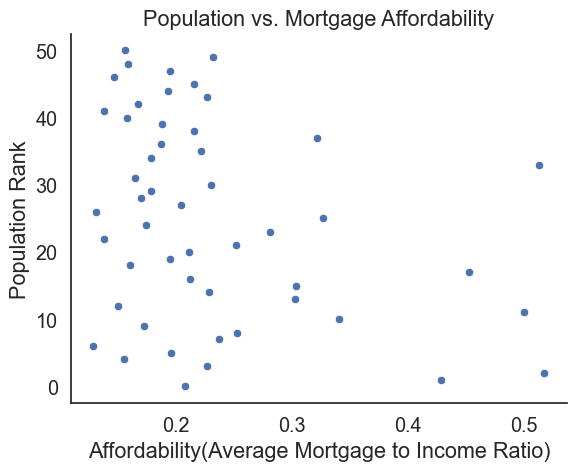

In [ ]:
scat = sns.scatterplot(data=untiered, x='Average_affordability', y='PopRank')
scat.set(title='Population vs. Mortgage Affordability', xlabel= 'Affordability(Average Mortgage to Income Ratio)', ylabel='Population Rank')

### Observation 

Does not seem to have much correlation, seems that populations has no effect on mortgage affordability

### Let's plot this again, this time looking at the different tiers of affordability(classes)

[Text(0.5, 1.0, 'Population vs. Mortgage Affordability'),
 Text(0.5, 0, 'Affordability(Average Mortgage to Income Ratio)'),
 Text(0, 0.5, 'Population Rank')]

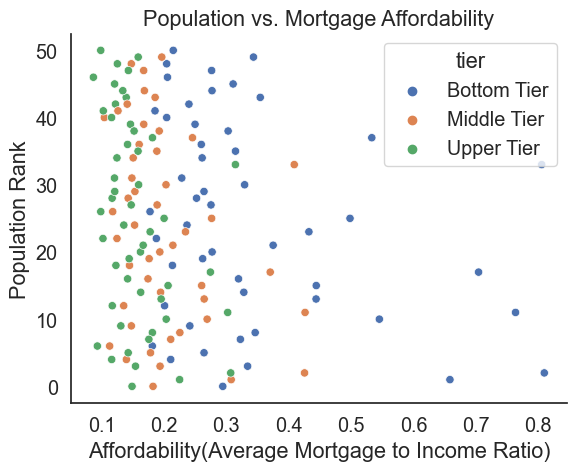

In [ ]:
scat = sns.scatterplot(df_avg, x='Average_affordability', y='PopRank', hue='tier')
scat.set(title='Population vs. Mortgage Affordability', xlabel= 'Affordability(Average Mortgage to Income Ratio)', ylabel='Population Rank')

### Observation

Still no correlation within individual tiers, however we can see that their is a corretion between tiers. It appears that the higher classes have more affordable mortgages on average

### Let's see if we can draw any other conclusions by state instead of region.

In [ ]:
byStates = func.tostates(untiered)
byStates.head()

,RegionName,PopRank,Average_affordability
0,AL,48.000000,0.158392
1,AZ,14.000000,0.228893
2,CA,16.833333,0.435835
3,CO,21.000000,0.251986
4,CT,43.000000,0.227248


In [ ]:
#Save Data
df.to_csv('../data/processed/MortgageAffordabilitybyState')

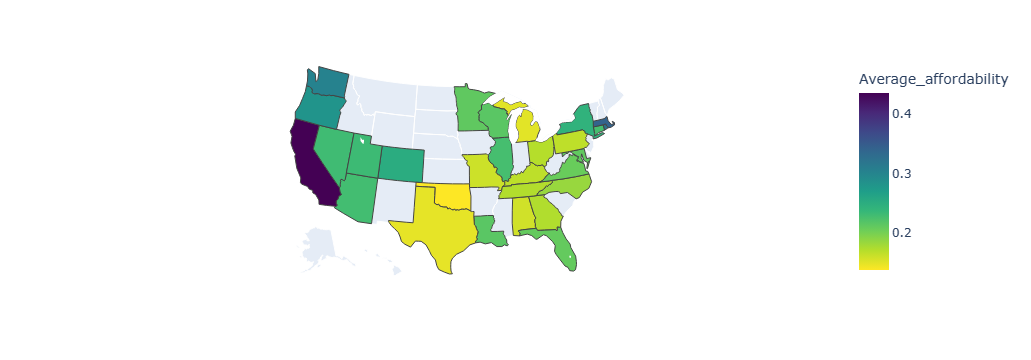

In [ ]:
import plotly.express as px
#plot average affortabilities accross the U.S. on map
fig = px.choropleth(byStates,
                    locations='RegionName', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Average_affordability',
                    color_continuous_scale="Viridis_r", 
                    )

fig.show()

### Observtion

Don't see much correlation here although we can see that the states west coast of the us and upper east coast are typically less affordable

### Let's Try a different plot 

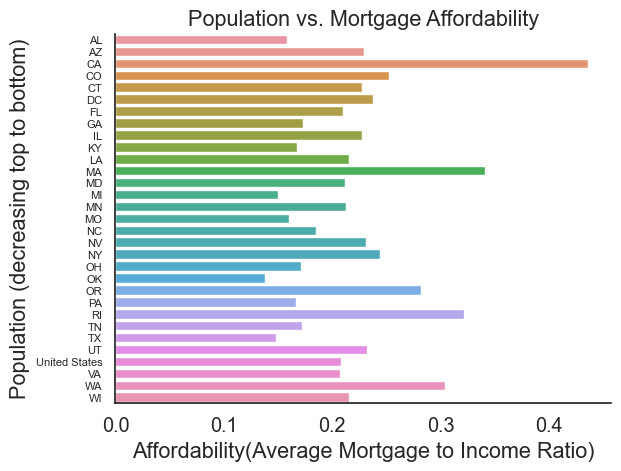

In [ ]:
df = byStates.sort_values('PopRank')
bar = sns.barplot(data=byStates, x='Average_affordability', y='RegionName', orient='h')
bar.set(title='Population vs. Mortgage Affordability', xlabel= 'Affordability(Average Mortgage to Income Ratio)', ylabel='Population (decreasing top to bottom)')
plt.tick_params(axis='y', labelsize=8)

### Realization/Observation

**These do not show proper results. we can't order by population rank of states as the data does not account for all regions in a state. We would have to take max rank of each state instead of average or plot by region which we have already seen**

### Conclusion

It seems as there isn't much or any correlation between affordability and population, this may be a result of a relationship between average pay and population as more populus regions are typically more 'expensive' but there are usually more jobs and an average higher income. Now we did see a correlation between the different class/tier groups so let's shift our focus into that direction.

### Now let's process our data and plot it to see how affordabilty changes between different tiers over time.

In [ ]:

datedTiers = func.load_and_process_meltdates(raw)
datedTiers.head(10)

,tier,Affordability,Date
0,Bottom Tier,0.300007,1999-06-30
1,Middle Tier,0.183958,1999-06-30
2,Upper Tier,0.147950,1999-06-30
3,Bottom Tier,0.315030,1999-09-30
4,Middle Tier,0.191210,1999-09-30
5,Upper Tier,0.155872,1999-09-30
6,Bottom Tier,0.316834,1999-12-31
7,Middle Tier,0.196901,1999-12-31
8,Upper Tier,0.157198,1999-12-31
9,Bottom Tier,0.334600,2000-03-31


[Text(0.5, 1.0, 'Mortgage Affordabilty in the U.S.'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Average Mortgage Price to Income Ratio')]

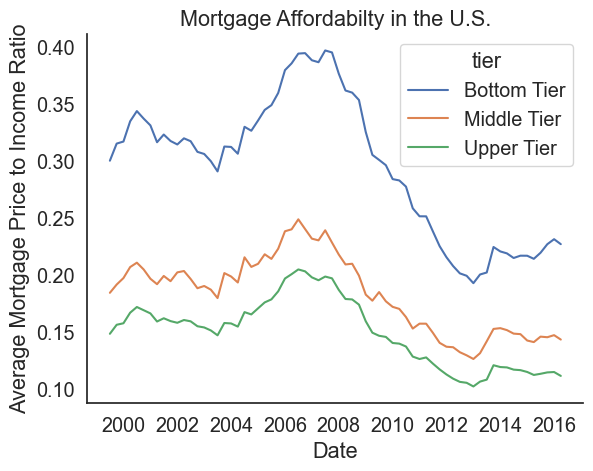

In [ ]:
tier_rel = sns.lineplot(data=datedTiers, x='Date', y='Affordability', hue='tier')
tier_rel.set(title='Mortgage Affordabilty in the U.S.', xlabel='Date', ylabel='Average Mortgage Price to Income Ratio')

### Observation

This visualization really shows the trend of mortgage affordability over time. We can clearly see the same shape/trend across all tiers. This plot also clearly highlights how higher tiers have more affordable mortgages.

### Now that we see the similarities in the trends of each tier, lets see if they have a constant relationship or not.

To do this we are going to look at plots of the differnce in affordability between tiers.

In [ ]:
tierdiff = func.meltdates_to_tierdiff(datedTiers)
tierdiff

tier,Bottom Tier,Middle Tier,Upper Tier,bottom_middle_diff,middle_upper_diff
Date,,,,,
1999-06-30,0.300007,0.183958,0.147950,0.116049,0.036007
1999-09-30,0.315030,0.191210,0.155872,0.123820,0.035338
1999-12-31,0.316834,0.196901,0.157198,0.119933,0.039703
2000-03-31,0.334600,0.206566,0.166470,0.128034,0.040095
2000-06-30,0.343596,0.210426,0.171481,0.133170,0.038945
...,...,...,...,...,...
2015-03-31,0.213811,0.140656,0.111791,0.073155,0.028865
2015-06-30,0.219128,0.145460,0.112807,0.073667,0.032653
2015-09-30,0.226646,0.144927,0.114031,0.081719,0.030896


In [ ]:
#save data
datedTiers.to_csv('../data/processed/AffordabilitybyDate')
tierdiff.to_csv('../data/processed/DifferenceTierAffordabilitybyDate')

[Text(0.5, 1.0, 'Mortgage Affordabilty in the U.S.'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Average Mortgage Price to Income Ratio')]

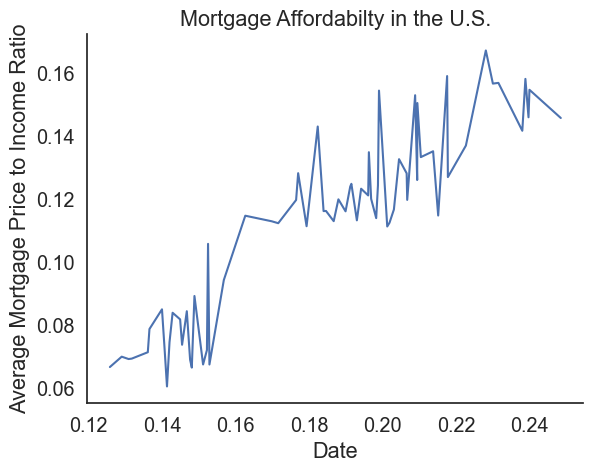

In [ ]:
tier_diff1 = sns.lineplot(data=tierdiff, x='Middle Tier', y='bottom_middle_diff')
tier_diff1.set(title='Mortgage Affordabilty in the U.S.', xlabel='Date', ylabel='Average Mortgage Price to Income Ratio')

[Text(0.5, 1.0, 'Difference in Mortgage Affortability between up'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Average Mortgage Price to Income Ratio')]

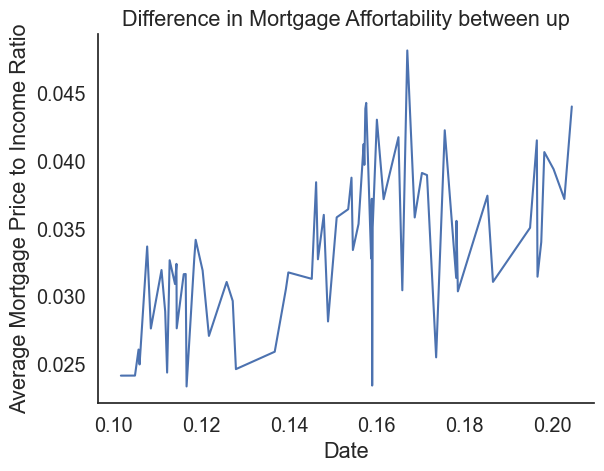

In [ ]:
tier_diff2 = sns.lineplot(data=tierdiff, x='Upper Tier', y='middle_upper_diff')
tier_diff2.set(title='Difference in Mortgage Affortability between up', xlabel='Date', ylabel='Average Mortgage Price to Income Ratio')

### Observation

Here we see a general upward trend. Although small, this implies that as homes become less affordable for a certain tier, they become increasinly less affordable for lower tier americans. Recall that a higher mortgage affordability ratio means a less affordble mortgage as the ratio is taken by divding the average mortgage price by the average income for diffent class americans(tiers), see main github README file for more detailed explaination of how data is calculated.

### Conclusion

The previous 3 visualizations lead us to the conclusion that as Mortgage Affordability changes over time, the trends are very similar for different classes, but with higher classes having more affordable mortgages. Also, as mortgages become more or less affordable, the change is more drastic for lower classes.